# Pandas 数据清洗

数据清洗是对一些没有用的数据进行处理的过程。

很多数据集存在数据缺失、数据格式错误、错误数据或重复数据的情况，如果要使数据分析更加准确，就需要对这些没有用的数据进行处理。

在这个教程中，我们将利用 `Pandas`包来进行数据清洗。

本文使用到的测试数据 [property-data.csv](https://static.runoob.com/download/property-data.csv) 如下：

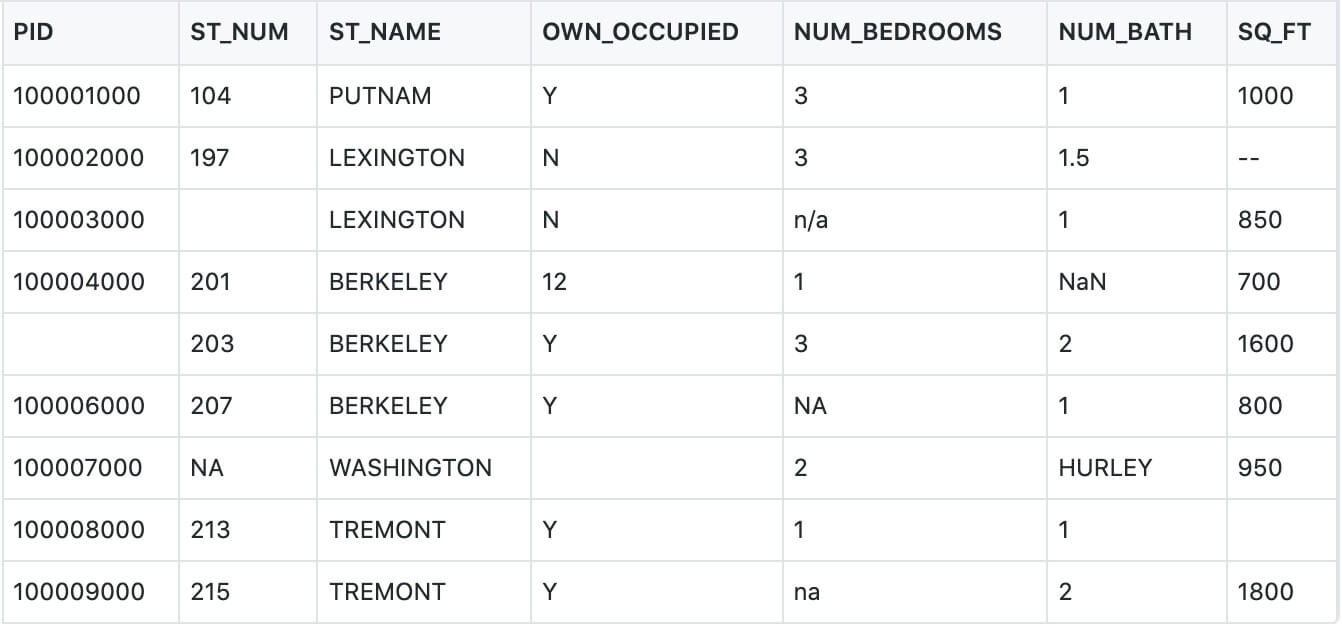

上表包含了四种空数据：

- n/a
- NA
- —
- na

## Pandas 清洗空值
如果我们要删除包含空字段的行，可以使用 `dropna()` 方法，语法格式如下：

```python
DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
```

参数说明：

- `axis`：默认为 0，表示逢空值剔除整行，如果设置参数 axis＝1 表示逢空值去掉整列。
- `how`：默认为 'any' 如果一行（或一列）里任何一个数据有出现 NA 就去掉整行，如果设置 how='all' 一行（或列）都是 NA 才去掉这整行。
- `thresh`：设置需要多少非空值的数据才可以保留下来的。
- `subset`：设置想要检查的列。如果是多个列，可以使用列名的 list 作为参数。
- `inplace`：如果设置 True，将计算得到的值直接覆盖之前的值并返回 None，修改的是源数据。
- 
我们可以通过 `isnull()` 判断各个单元格是否为空。

In [ ]:
import pandas as pd

df = pd.read_csv('property-data.csv')

print (df['NUM_BEDROOMS'])
print (df['NUM_BEDROOMS'].isnull())

以上例子中我们看到 `Pandas` 把 `n/a` 和 `NA` 当作空数据，`na` 不是空数据，不符合我们要求，我们可以指定空数据类型：

In [ ]:
import pandas as pd

missing_values = ["n/a", "na", "--"]
df = pd.read_csv('property-data.csv', na_values = missing_values)

print (df['NUM_BEDROOMS'])
print (df['NUM_BEDROOMS'].isnull())

接下来的实例演示了删除包含空数据的行。

In [ ]:
import pandas as pd

df = pd.read_csv('property-data.csv')

new_df = df.dropna()

print(new_df.to_string())

**注意：**默认情况下，`dropna()` 方法返回一个新的 DataFrame，不会修改源数据。

如果你要修改源数据 `DataFrame`, 可以使用 `inplace = True` 参数:

In [ ]:
import pandas as pd

df = pd.read_csv('property-data.csv')

df.dropna(inplace = True)

print(df.to_string())

我们也可以移除指定列有空值的行：

In [ ]:
import pandas as pd

df = pd.read_csv('property-data.csv')

df.dropna(subset=['ST_NUM'], inplace = True)

print(df.to_string())

我们也可以 `fillna()` 方法来替换一些空字段：

In [ ]:
import pandas as pd

df = pd.read_csv('property-data.csv')

df.fillna(12345, inplace = True)

print(df.to_string())

我们也可以指定某一个列来替换数据：

In [ ]:
import pandas as pd

df = pd.read_csv('property-data.csv')

df['PID'].fillna(12345, inplace = True)

print(df.to_string())

替换空单元格的常用方法是计算列的均值、中位数值或众数。

`Pandas`使用 `mean()`、`median()` 和 `mode() `方法计算列的均值（所有值加起来的平均值）、中位数值（排序后排在中间的数）和众数（出现频率最高的数）。

In [ ]:
import pandas as pd

df = pd.read_csv('property-data.csv')

x = df["ST_NUM"].mean()

df["ST_NUM"].fillna(x, inplace = True)

print(df.to_string())

In [ ]:
import pandas as pd

df = pd.read_csv('property-data.csv')

x = df["ST_NUM"].median()

df["ST_NUM"].fillna(x, inplace = True)

print(df.to_string())

In [ ]:
import pandas as pd

df = pd.read_csv('property-data.csv')

x = df["ST_NUM"].mode()

df["ST_NUM"].fillna(x, inplace = True)

print(df.to_string())

## Pandas 清洗格式错误数据

数据格式错误的单元格会使数据分析变得困难，甚至不可能。

我们可以通过包含空单元格的行，或者将列中的所有单元格转换为相同格式的数据。

以下实例会格式化日期：

In [ ]:
import pandas as pd

# 第三个日期格式错误
data = {
 "Date": ['2020/12/01', '2020/12/02' , '20201226'],
 "duration": [50, 40, 45]
}

df = pd.DataFrame(data, index = ["day1", "day2", "day3"])

# 用参数format='mixed'确保针对不同的格式的日期使用不同的格式化方式
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

print(df.to_string())

## Pandas 清洗错误数据

数据错误也是很常见的情况，我们可以对错误的数据进行替换或移除。

以下实例会替换错误年龄的数据：

In [ ]:
import pandas as pd

person = {
 "name": ['Google', 'Runoob' , 'Taobao'],
 "age": [50, 40, 12345]    # 12345 年龄数据是错误的
}

df = pd.DataFrame(person)

df.loc[2, 'age'] = 30 # 修改数据

print(df.to_string())

也可以设置条件语句：

In [ ]:
import pandas as pd

person = {
 "name": ['Google', 'Runoob' , 'Taobao'],
 "age": [50, 200, 12345]
}

df = pd.DataFrame(person)

for x in df.index:
    if df.loc[x, "age"] > 120:
        df.loc[x, "age"] = 120

print(df.to_string())

也可以将错误数据的行删除：

In [ ]:
import pandas as pd

person = {
    "name": ['Google', 'Runoob' , 'Taobao'],
    "age": [50, 40, 12345]    # 12345 年龄数据是错误的
}

df = pd.DataFrame(person)

for x in df.index:
    if df.loc[x, "age"] > 120:
        df.drop(x, inplace = True)

print(df.to_string())

## Pandas 清洗重复数据

如果我们要清洗重复数据，可以使用 `duplicated()` 和 `drop_duplicates()` 方法。

如果对应的数据是重复的，`duplicated()` 会返回 `True`，否则返回 `False`。

In [ ]:
import pandas as pd

person = {
    "name": ['Google', 'Runoob', 'Runoob', 'Taobao'],
    "age": [50, 40, 40, 23]
}
df = pd.DataFrame(person)

print(df.duplicated())

删除重复数据，可以直接使用 `drop_duplicates()` 方法。

In [ ]:
import pandas as pd

persons = {
    "name": ['Google', 'Runoob', 'Runoob', 'Taobao'],
    "age": [50, 40, 40, 23]
}

df = pd.DataFrame(persons)

df.drop_duplicates(inplace = True)
print(df)